<a href="https://colab.research.google.com/github/elderoliveira-01/Projeto-de-Transfer-Learning-em-Python/blob/main/Matriz_Confus%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import itertools
import sklearn
import matplotlib

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from xgboost import XGBClassifier

In [47]:
sklearn.__version__, matplotlib.__version__, np.__version__

('1.5.2', '3.8.0', '1.26.4')

In [48]:
X, y = make_classification(
    n_samples=10000,
    n_features=25,
    n_informative=10,
    n_redundant=0,
    n_classes=5)

class_names = ['class-1','class-2','class-3','class-4','class-5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = XGBClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

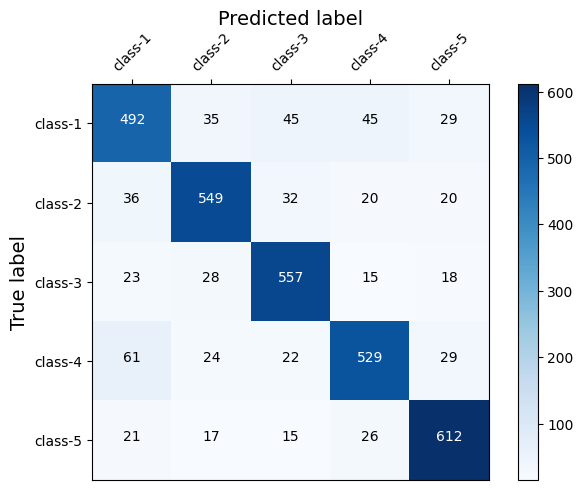

In [49]:
matrix = confusion_matrix(y_test,y_pred)

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm.sum() - (cm.sum(axis=1) + cm.sum(axis=0)) + cm.diagonal()
    fp = cm.sum(axis=0) - cm.diagonal()
    specificity = tn / (tn + fp)
    return specificity.mean()

plt.clf()

plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

plt.colorbar()

fmt = 'd'

thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):


    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [50]:
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
print("Recall (Sensibilidade):", recall)

Recall (Sensibilidade): 0.8294685526486184


In [51]:
specificity = specificity_score(y_test, y_pred)
print("Specificity:", specificity)

Specificity: 0.9575253497842382


In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.83


In [53]:
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
print("Precision:", precision)

Precision: 0.8291136442914369


In [54]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1}")

F1-Score: 0.8290722329215694
